In [2]:
# Import neccessary libries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 222)
import matplotlib
import missingno as msno

In [3]:
# Read data 
df_1 = pd.read_csv('integrated_mac.csv')
df_2 = pd.read_csv('integrated_steph.csv')
df_3 = pd.read_csv('integrated_windows.csv')

merged_df = pd.concat([df_1, df_2, df_3])
# Check the shape of new df
# merged_df.shape

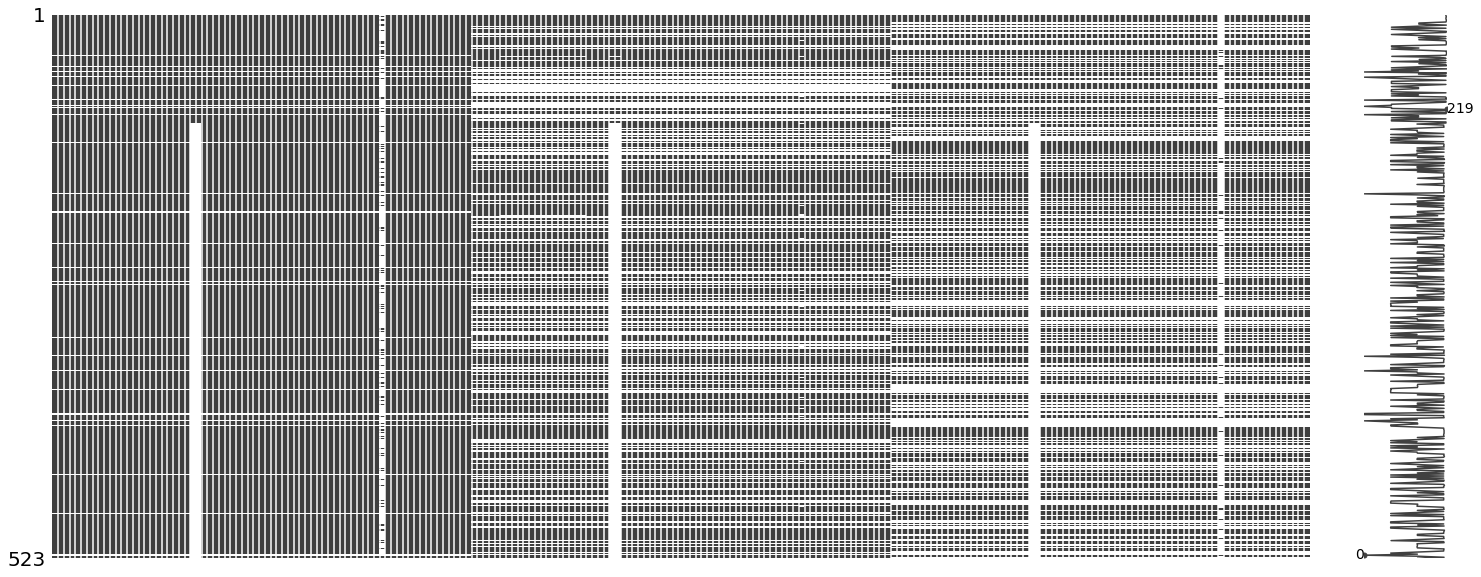

In [4]:
# Plot missing value matrix
missingdata_df = merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])

In [ ]:
# Plot correlation heatmap
msno.heatmap(merged_df[missingdata_df], figsize = (20,20))
# This map describes the degree of nullity relationship between the different features
# The range of this nullity correlationis from -1 <= R <= 1. 
# If the nullity correlation is between -0.05 to 0.05, no value will be displayed.
# A perfect positive nullity correlation R = 1 indicates when the first feature and second feature both have corresponding missing values while a perfect negative nullity correlation(R= -1) means that one of the features is missing and the second is not missing. 

In [1]:
merged_df.describe()

NameError: name 'merged_df' is not defined

There are 496 out of 524 records have lead II waveform information. 
Same = Extracted_length(), II_autocorrelation_lag_0(1), PLETH__autocorrelation__lag_0(1)

There are 352 out of 524 records have PLETH waveform information. 


All 0s: II__large_standard_deviation__r_0.4, II__large_standard_deviation__r_0.45, II__large_standard_deviation__r_0.5, II__large_standard_deviation__r_0.55, II__large_standard_deviation__r_0.6000000000000001, II__large_standard_deviation__r_0.65, II__large_standard_deviation__r_0.7000000000000001, II__large_standard_deviation__r_0.75, II__large_standard_deviation__r_0.8, II__large_standard_deviation__r_0.8500000000000001, II__large_standard_deviation__r_0.9, II__large_standard_deviation__r_0.9500000000000001	


All 0s: V__large_standard_deviation__r_0.4	V__large_standard_deviation__r_0.45	V__large_standard_deviation__r_0.5	V__large_standard_deviation__r_0.55	V__large_standard_deviation__r_0.6000000000000001	V__large_standard_deviation__r_0.65	V__large_standard_deviation__r_0.7000000000000001	V__large_standard_deviation__r_0.75	V__large_standard_deviation__r_0.8	V__large_standard_deviation__r_0.8500000000000001	V__large_standard_deviation__r_0.9	V__large_standard_deviation__r_0.9500000000000001




II_first_location_of_maximum, II_first_location_of_minimum, II_large_standard_deviation_r_0.05, II_large_standard_deviation_r_0.01, II__large_standard_deviation__r_0.15000000000000002, II__large_standard_deviation__r_0.2, II__large_standard_deviation__r_0.25, II__large_standard_deviation__r_0.30000000000000004, II__large_standard_deviation__r_0.35000000000000003, II__large_standard_deviation__r_0.4, 

II_large_standard_deviation_r_0.01, II__large_standard_deviation__r_0.15000000000000002, II__large_standard_deviation__r_0.2 = 25% = 0 

II__large_standard_deviation__r_0.15000000000000002, II__large_standard_deviation__r_0.2 = 50% = 0 


Conclude that the missingless values in this dataset is missing completely at random, so we will use MICE techniques to do the imputation.

In [18]:
# Import imputation library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  

In [36]:
mice_imputer = IterativeImputer(max_iter = 5, random_state = 0)
merged_df_mice_imputed = merged_df.copy()
# Slice TFLUID from merged_df 
merged_df_mice_imputed = merged_df_mice_imputed.loc[:,merged_df_mice_imputed.columns != "TFLUID"]
merged_df_mice_imputed.iloc[:,:] = mice_imputer.fit_transform(merged_df_mice_imputed)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [42]:
# Check imputation 
merged_df_mice_imputed.describe()

,Unnamed: 0,SUBJECT_ID,EXTRACTED_LENGTH,II__abs_energy,II__absolute_sum_of_changes,II__agg_autocorrelation__f_agg_mean__maxlag_40,II__agg_autocorrelation__f_agg_median__maxlag_40,II__agg_autocorrelation__f_agg_var__maxlag_40,II__ar_coefficient__k_10__coeff_0,II__ar_coefficient__k_10__coeff_1,II__ar_coefficient__k_10__coeff_2,II__ar_coefficient__k_10__coeff_3,II__ar_coefficient__k_10__coeff_4,II__autocorrelation__lag_0,II__autocorrelation__lag_1,II__autocorrelation__lag_2,II__autocorrelation__lag_3,II__autocorrelation__lag_4,II__autocorrelation__lag_5,II__autocorrelation__lag_6,II__autocorrelation__lag_7,II__autocorrelation__lag_8,II__autocorrelation__lag_9,II__binned_entropy__max_bins_10,II__count_above_mean,II__count_below_mean,II__fft_aggregated__aggtype_centroid,II__fft_aggregated__aggtype_kurtosis,II__fft_aggregated__aggtype_skew,II__fft_aggregated__aggtype_variance,II__first_location_of_maximum,II__first_location_of_minimum,II__kurtosis,II__large_standard_deviation__r_0.05,II__large_standard_deviation__r_0.1,II__large_standard_deviation__r_0.15000000000000002,II__large_standard_deviation__r_0.2,II__large_standard_deviation__r_0.25,II__large_standard_deviation__r_0.30000000000000004,II__large_standard_deviation__r_0.35000000000000003,II__large_standard_deviation__r_0.4,II__large_standard_deviation__r_0.45,II__large_standard_deviation__r_0.5,II__large_standard_deviation__r_0.55,II__large_standard_deviation__r_0.6000000000000001,II__large_standard_deviation__r_0.65,II__large_standard_deviation__r_0.7000000000000001,II__large_standard_deviation__r_0.75,II__large_standard_deviation__r_0.8,II__large_standard_deviation__r_0.8500000000000001,II__large_standard_deviation__r_0.9,II__large_standard_deviation__r_0.9500000000000001,II__length,II__linear_trend__attr_intercept,II__linear_trend__attr_pvalue,II__linear_trend__attr_rvalue,II__linear_trend__attr_slope,II__linear_trend__attr_stderr,II__longest_strike_above_mean,II__longest_strike_below_mean,II__max_langevin_fixed_point__m_3__r_30,II__maximum,II__mean,II__median,II__minimum,II__quantile__q_0.1,II__quantile__q_0.2,II__quantile__q_0.3,II__quantile__q_0.4,II__quantile__q_0.6,II__quantile__q_0.7,II__quantile__q_0.8,II__quantile__q_0.9,II__skewness,II__standard_deviation,II__variance,PLETH__abs_energy,PLETH__absolute_sum_of_changes,PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,PLETH__agg_autocorrelation__f_agg_median__maxlag_40,PLETH__agg_autocorrelation__f_agg_var__maxlag_40,PLETH__ar_coefficient__k_10__coeff_0,PLETH__ar_coefficient__k_10__coeff_1,PLETH__ar_coefficient__k_10__coeff_2,PLETH__ar_coefficient__k_10__coeff_3,PLETH__ar_coefficient__k_10__coeff_4,PLETH__autocorrelation__lag_0,PLETH__autocorrelation__lag_1,PLETH__autocorrelation__lag_2,PLETH__autocorrelation__lag_3,PLETH__autocorrelation__lag_4,PLETH__autocorrelation__lag_5,PLETH__autocorrelation__lag_6,PLETH__autocorrelation__lag_7,PLETH__autocorrelation__lag_8,PLETH__autocorrelation__lag_9,PLETH__binned_entropy__max_bins_10,PLETH__count_above_mean,PLETH__count_below_mean,PLETH__fft_aggregated__aggtype_centroid,PLETH__fft_aggregated__aggtype_kurtosis,PLETH__fft_aggregated__aggtype_skew,PLETH__fft_aggregated__aggtype_variance,PLETH__first_location_of_maximum,PLETH__first_location_of_minimum,PLETH__kurtosis,PLETH__large_standard_deviation__r_0.05,PLETH__large_standard_deviation__r_0.1,PLETH__large_standard_deviation__r_0.15000000000000002,PLETH__large_standard_deviation__r_0.2,PLETH__large_standard_deviation__r_0.25,PLETH__large_standard_deviation__r_0.30000000000000004,PLETH__large_standard_deviation__r_0.35000000000000003,PLETH__large_standard_deviation__r_0.4,PLETH__large_standard_deviation__r_0.45,PLETH__large_standard_deviation__r_0.5,PLETH__large_standard_deviation__r_0.55,PLETH__large_standard_deviation__r_0.6000000000000001,PLETH__large_standard_deviation__r_0.65,PLETH__large_standard_deviation__r_0.7000000000000001,PLETH__large_standard_deviation__r_0.75,PLETH__large_standard_deviation__r_0.8,PLETH__large_sta

In [41]:
merged_df_mice_imputed['TFLUID'] = merged_df['TFLUID']

Merge current imputed waveform data with EMR data

In [45]:
# Import icustays.csv to know icustay_id for each subject_id
# Import df5_wfflag.xlsx to join with waveform data
# subject_id may have multiple icustay_id 

icustays = pd.read_csv("ICUSTAYS.csv")
emrdata = pd.read_excel("df5_wfflag.xlsx")

In [209]:
icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198/2/14 23:27,2198/2/18 5:26,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170/11/5 11:05,2170/11/8 17:46,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128/6/24 15:05,2128/6/27 12:32,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120/8/7 23:12,2120/8/10 0:39,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186/12/25 21:08,2186/12/27 12:01,1.6202


In [61]:
# Delete the first useless column from merged_df
merged_df_mice_imputed = merged_df_mice_imputed.drop(['Unnamed: 0'],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [88]:
emrdata.head()
emrdata.columns = emrdata.columns.str.upper()

In [62]:
merged_df_mice_imputed.head()

,SUBJECT_ID,EXTRACTED_LENGTH,II__abs_energy,II__absolute_sum_of_changes,II__agg_autocorrelation__f_agg_mean__maxlag_40,II__agg_autocorrelation__f_agg_median__maxlag_40,II__agg_autocorrelation__f_agg_var__maxlag_40,II__ar_coefficient__k_10__coeff_0,II__ar_coefficient__k_10__coeff_1,II__ar_coefficient__k_10__coeff_2,II__ar_coefficient__k_10__coeff_3,II__ar_coefficient__k_10__coeff_4,II__autocorrelation__lag_0,II__autocorrelation__lag_1,II__autocorrelation__lag_2,II__autocorrelation__lag_3,II__autocorrelation__lag_4,II__autocorrelation__lag_5,II__autocorrelation__lag_6,II__autocorrelation__lag_7,II__autocorrelation__lag_8,II__autocorrelation__lag_9,II__binned_entropy__max_bins_10,II__count_above_mean,II__count_below_mean,II__fft_aggregated__aggtype_centroid,II__fft_aggregated__aggtype_kurtosis,II__fft_aggregated__aggtype_skew,II__fft_aggregated__aggtype_variance,II__first_location_of_maximum,II__first_location_of_minimum,II__kurtosis,II__large_standard_deviation__r_0.05,II__large_standard_deviation__r_0.1,II__large_standard_deviation__r_0.15000000000000002,II__large_standard_deviation__r_0.2,II__large_standard_deviation__r_0.25,II__large_standard_deviation__r_0.30000000000000004,II__large_standard_deviation__r_0.35000000000000003,II__large_standard_deviation__r_0.4,II__large_standard_deviation__r_0.45,II__large_standard_deviation__r_0.5,II__large_standard_deviation__r_0.55,II__large_standard_deviation__r_0.6000000000000001,II__large_standard_deviation__r_0.65,II__large_standard_deviation__r_0.7000000000000001,II__large_standard_deviation__r_0.75,II__large_standard_deviation__r_0.8,II__large_standard_deviation__r_0.8500000000000001,II__large_standard_deviation__r_0.9,II__large_standard_deviation__r_0.9500000000000001,II__length,II__linear_trend__attr_intercept,II__linear_trend__attr_pvalue,II__linear_trend__attr_rvalue,II__linear_trend__attr_slope,II__linear_trend__attr_stderr,II__longest_strike_above_mean,II__longest_strike_below_mean,II__max_langevin_fixed_point__m_3__r_30,II__maximum,II__mean,II__median,II__minimum,II__quantile__q_0.1,II__quantile__q_0.2,II__quantile__q_0.3,II__quantile__q_0.4,II__quantile__q_0.6,II__quantile__q_0.7,II__quantile__q_0.8,II__quantile__q_0.9,II__skewness,II__standard_deviation,II__variance,PLETH__abs_energy,PLETH__absolute_sum_of_changes,PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,PLETH__agg_autocorrelation__f_agg_median__maxlag_40,PLETH__agg_autocorrelation__f_agg_var__maxlag_40,PLETH__ar_coefficient__k_10__coeff_0,PLETH__ar_coefficient__k_10__coeff_1,PLETH__ar_coefficient__k_10__coeff_2,PLETH__ar_coefficient__k_10__coeff_3,PLETH__ar_coefficient__k_10__coeff_4,PLETH__autocorrelation__lag_0,PLETH__autocorrelation__lag_1,PLETH__autocorrelation__lag_2,PLETH__autocorrelation__lag_3,PLETH__autocorrelation__lag_4,PLETH__autocorrelation__lag_5,PLETH__autocorrelation__lag_6,PLETH__autocorrelation__lag_7,PLETH__autocorrelation__lag_8,PLETH__autocorrelation__lag_9,PLETH__binned_entropy__max_bins_10,PLETH__count_above_mean,PLETH__count_below_mean,PLETH__fft_aggregated__aggtype_centroid,PLETH__fft_aggregated__aggtype_kurtosis,PLETH__fft_aggregated__aggtype_skew,PLETH__fft_aggregated__aggtype_variance,PLETH__first_location_of_maximum,PLETH__first_location_of_minimum,PLETH__kurtosis,PLETH__large_standard_deviation__r_0.05,PLETH__large_standard_deviation__r_0.1,PLETH__large_standard_deviation__r_0.15000000000000002,PLETH__large_standard_deviation__r_0.2,PLETH__large_standard_deviation__r_0.25,PLETH__large_standard_deviation__r_0.30000000000000004,PLETH__large_standard_deviation__r_0.35000000000000003,PLETH__large_standard_deviation__r_0.4,PLETH__large_standard_deviation__r_0.45,PLETH__large_standard_deviation__r_0.5,PLETH__large_standard_deviation__r_0.55,PLETH__large_standard_deviation__r_0.6000000000000001,PLETH__large_standard_deviation__r_0.65,PLETH__large_standard_deviation__r_0.7000000000000001,PLETH__large_standard_deviation__r_0.75,PLETH__large_standard_deviation__r_0.8,PLETH__large_standard_devia

In [232]:
# Merge icustays with emrdata to get subject_id
combined_df_1 = pd.merge(icustays[['SUBJECT_ID','ICUSTAY_ID','INTIME','OUTTIME']],
                        merged_df_mice_imputed,
                       on = 'SUBJECT_ID')
combined_df_1 = combined_df_1.dropna()

In [260]:
# Check if fluid administration time fall in icu stay time range
combined_df_1['TFLUID'] = pd.to_datetime(combined_df_1['TFLUID'])
combined_df_1['INTIME'] = pd.to_datetime(combined_df_1['INTIME'])
combined_df_1['OUTTIME'] = pd.to_datetime(combined_df_1['OUTTIME'])
combined_df_1['INTIME'] < combined_df_1['TFLUID']

index_notinrange_1 = combined_df_1[(combined_df_1['INTIME'] < combined_df_1['TFLUID'])==False].index
combined_df_1.drop(index_notinrange_1, inplace=True)
index_notinrange_2 = combined_df_1[(combined_df_1['TFLUID'] < combined_df_1['OUTTIME'])==False].index
combined_df_1.drop(index_notinrange_2,inplace=True)

In [301]:
# Merge above df with waveform
combined_df_2 = pd.merge(combined_df_1,
                        emrdata,
                       on = 'ICUSTAY_ID')

Check shapes 

In [303]:
combined_df_2.shape

(389, 284)

In [265]:
emrdata.shape

(15062, 60)

In [286]:
merged_df_mice_imputed.shape

(524, 222)

In [302]:
# Export to csv file
combined_df_2.to_csv('merged_file.csv')